In [1]:
%matplotlib inline

import pandas as pd
import networkx as nx

import warnings
from operator import itemgetter
from networkx.algorithms import community

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style("whitegrid")

from operator import is_not
from functools import partial

In [3]:
df = pd.read_csv("node2vec-motivasi.csv")
df

,partai,kalimat,kata0,kata1,kata2,kata3,kata4,kategori
0,Golkar,abdi maju bangsa juang aspirasi daerah ...,daerah,masyarakat,perempuan,kaum,ekonomi,Perekonomian Masyarakat
1,PAN,wakil rakyat daerah sumut 3 benar2 juang...,daerah,masyarakat,perempuan,kaum,kaum,Perekonomian Masyarakat
2,PSI,awas birokrasi perintah daerah ...,daerah,perempuan,kaum,ekonomi,ekonomi,Perekonomian Masyarakat
3,Hanura,berkonteribusi daerah pilih daerah ...,daerah,perempuan,kaum,ekonomi,ekonomi,Perekonomian Masyarakat
4,PDIP,ambil ambil putus bijak membangut daerah ...,daerah,masyarakat,perempuan,kaum,ekonomi,Perekonomian Masyarakat
5,Berkarya,maju daerah klungkung ...,daerah,perempuan,kaum,ekonomi,ekonomi,Perekonomian Masyarakat
6,PKB,bangun daerah lahir ...,daerah,perempuan,kaum,ekonomi,ekonomi,Perekonomian Masyarakat
7,Demokrat,bangun daerah,daerah,perempuan,kaum,ekonomi,ekonomi,Perekonomian Masyarakat
8,PPP,bantu bangun daerah ...,daerah,perempuan,ekonomi,ekonomi,ekonomi,Perekonomian Masyarakat
9,Garuda,muda guna maju bangsa indonesia daerah b...,daerah,perempuan,kaum,ekonomi,ekonomi,Perekonomian Masyarakat


In [4]:
g = nx.from_pandas_edgelist(df, source='kategori', target='kata0')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata1')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata2')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata3')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata4')

In [5]:
dfpartaikata0 = df[['partai','kata0']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata0clean = dfpartaikata0.dropna()
dfpartaikata0clean
listpartaikata0 = dfpartaikata0clean.values.tolist()
listpartaikata0

[['Golkar', 'daerah'],
 ['PAN', 'daerah'],
 ['PSI', 'daerah'],
 ['Hanura', 'daerah'],
 ['PDIP', 'daerah'],
 ['Berkarya', 'daerah'],
 ['PKB', 'daerah'],
 ['Demokrat', 'daerah'],
 ['PPP', 'daerah'],
 ['Garuda', 'daerah'],
 ['PKPI', 'daerah'],
 ['Gerindra', 'masyarakat'],
 ['PBB', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['Golkar', 'rakyat'],
 ['Gerindra', 'rakyat'],
 ['PAN', 'rakyat'],
 ['PSI', 'rakyat'],
 ['PKS', 'rakyat'],
 ['PPP', 'rakyat'],
 ['PDIP', 'rakyat'],
 ['PKPI', 'rakyat'],
 ['Demokrat', 'rakyat'],
 ['Nasdem', 'juang'],
 ['Garuda', 'penting'],
 ['Gerindra', 'masyarakat'],
 ['Garuda', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['PPP', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PBB', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['Demokrat', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['Hanura', 'masyarakat'],
 ['PKPI', 'masyarakat']]

In [7]:
dfpartaikata1 = df[['partai','kata1']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata1clean = dfpartaikata1.dropna()
dfpartaikata1clean
listpartaikata1 = dfpartaikata1clean.values.tolist()
listpartaikata1

[['Golkar', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['PSI', 'perempuan'],
 ['Hanura', 'perempuan'],
 ['PDIP', 'masyarakat'],
 ['Berkarya', 'perempuan'],
 ['PKB', 'perempuan'],
 ['Demokrat', 'perempuan'],
 ['PPP', 'perempuan'],
 ['Garuda', 'perempuan'],
 ['PKPI', 'masyarakat'],
 ['Gerindra', 'perempuan'],
 ['PBB', 'perempuan'],
 ['Nasdem', 'perempuan'],
 ['PKS', 'perempuan'],
 ['Golkar', 'juang'],
 ['Gerindra', 'juang'],
 ['PAN', 'juang'],
 ['PSI', 'juang'],
 ['PKS', 'juang'],
 ['PPP', 'perempuan'],
 ['PDIP', 'penting'],
 ['PKPI', 'penting'],
 ['Demokrat', 'penting'],
 ['Nasdem', 'perempuan'],
 ['Garuda', 'penting'],
 ['Gerindra', 'anak'],
 ['Garuda', 'anak'],
 ['PKB', 'juang'],
 ['PSI', 'juang'],
 ['Golkar', 'juang'],
 ['PPP', 'anak'],
 ['Berkarya', 'anak'],
 ['PBB', 'juang'],
 ['Nasdem', 'juang'],
 ['PKS', 'juang'],
 ['PAN', 'juang'],
 ['Demokrat', 'anak'],
 ['PDIP', 'juang'],
 ['Hanura', 'anak'],
 ['PKPI', 'juang']]

In [8]:
dfpartaikata2 = df[['partai','kata2']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata2clean = dfpartaikata2.dropna()
dfpartaikata2clean
listpartaikata2 = dfpartaikata2clean.values.tolist()
listpartaikata2

[['Golkar', 'perempuan'],
 ['PAN', 'perempuan'],
 ['PSI', 'kaum'],
 ['Hanura', 'kaum'],
 ['PDIP', 'perempuan'],
 ['Berkarya', 'kaum'],
 ['PKB', 'kaum'],
 ['Demokrat', 'kaum'],
 ['PPP', 'ekonomi'],
 ['Garuda', 'kaum'],
 ['PKPI', 'perempuan'],
 ['Gerindra', 'kaum'],
 ['PBB', 'kaum'],
 ['Nasdem', 'kaum'],
 ['PKS', 'kaum'],
 ['Golkar', 'penting'],
 ['Gerindra', 'penting'],
 ['PAN', 'penting'],
 ['PSI', 'penting'],
 ['PKS', 'perempuan'],
 ['PPP', 'maju'],
 ['PDIP', 'perempuan'],
 ['PKPI', 'maju'],
 ['Demokrat', 'perempuan'],
 ['Nasdem', 'perempuan'],
 ['Garuda', 'penting'],
 ['Gerindra', 'juang'],
 ['Garuda', 'juang'],
 ['PKB', 'didik'],
 ['PSI', 'kota'],
 ['Golkar', 'kota'],
 ['PPP', 'juang'],
 ['Berkarya', 'juang'],
 ['PBB', 'juang'],
 ['Nasdem', 'didik'],
 ['PKS', 'didik'],
 ['PAN', 'didik'],
 ['Demokrat', 'juang'],
 ['PDIP', 'kota'],
 ['Hanura', 'juang'],
 ['PKPI', 'didik']]

In [9]:
dfpartaikata3 = df[['partai','kata3']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata3clean = dfpartaikata3.dropna()
dfpartaikata3clean
listpartaikata3 = dfpartaikata3clean.values.tolist()
listpartaikata3

[['Golkar', 'kaum'],
 ['PAN', 'kaum'],
 ['PSI', 'ekonomi'],
 ['Hanura', 'ekonomi'],
 ['PDIP', 'kaum'],
 ['Berkarya', 'ekonomi'],
 ['PKB', 'ekonomi'],
 ['Demokrat', 'ekonomi'],
 ['PPP', 'ekonomi'],
 ['Garuda', 'ekonomi'],
 ['PKPI', 'kaum'],
 ['Gerindra', 'ekonomi'],
 ['PBB', 'ekonomi'],
 ['Nasdem', 'ekonomi'],
 ['PKS', 'ekonomi'],
 ['Golkar', 'perempuan'],
 ['Gerindra', 'perempuan'],
 ['PAN', 'perempuan'],
 ['PSI', 'perempuan'],
 ['PKS', 'perempuan'],
 ['PPP', 'maju'],
 ['PDIP', 'maju'],
 ['PKPI', 'maju'],
 ['Demokrat', 'perempuan'],
 ['Nasdem', 'perempuan'],
 ['Garuda', 'penting'],
 ['Gerindra', 'kota'],
 ['Garuda', 'kota'],
 ['PKB', 'didik'],
 ['PSI', 'kota'],
 ['Golkar', 'kota'],
 ['PPP', 'didik'],
 ['Berkarya', 'didik'],
 ['PBB', 'juang'],
 ['Nasdem', 'didik'],
 ['PKS', 'kota'],
 ['PAN', 'kota'],
 ['Demokrat', 'kota'],
 ['PDIP', 'kota'],
 ['Hanura', 'didik'],
 ['PKPI', 'kota']]

In [10]:
dfpartaikata4 = df[['partai','kata4']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata4clean = dfpartaikata4.dropna()
dfpartaikata4clean
listpartaikata4 = dfpartaikata4clean.values.tolist()
listpartaikata4

[['Golkar', 'ekonomi'],
 ['PAN', 'kaum'],
 ['PSI', 'ekonomi'],
 ['Hanura', 'ekonomi'],
 ['PDIP', 'ekonomi'],
 ['Berkarya', 'ekonomi'],
 ['PKB', 'ekonomi'],
 ['Demokrat', 'ekonomi'],
 ['PPP', 'ekonomi'],
 ['Garuda', 'ekonomi'],
 ['PKPI', 'ekonomi'],
 ['Gerindra', 'ekonomi'],
 ['PBB', 'ekonomi'],
 ['Nasdem', 'maju'],
 ['PKS', 'maju'],
 ['Golkar', 'maju'],
 ['Gerindra', 'maju'],
 ['PAN', 'maju'],
 ['PSI', 'maju'],
 ['PKS', 'perempuan'],
 ['PPP', 'maju'],
 ['PDIP', 'maju'],
 ['PKPI', 'maju'],
 ['Demokrat', 'perempuan'],
 ['Nasdem', 'perempuan'],
 ['Garuda', 'penting'],
 ['Gerindra', 'kota'],
 ['Garuda', 'kota'],
 ['PKB', 'didik'],
 ['PSI', 'kota'],
 ['Golkar', 'kota'],
 ['PPP', 'kota'],
 ['Berkarya', 'kota'],
 ['PBB', 'juang'],
 ['Nasdem', 'didik'],
 ['PKS', 'kota'],
 ['PAN', 'kota'],
 ['Demokrat', 'kota'],
 ['PDIP', 'kota'],
 ['Hanura', 'kota'],
 ['PKPI', 'kota']]

In [11]:
g.add_edges_from(listpartaikata0,weight=1, label="partaikata0edge")
g.add_edges_from(listpartaikata1,weight=1, label="partaikata1edge")
g.add_edges_from(listpartaikata2,weight=1, label="partaikata2edge")
g.add_edges_from(listpartaikata3,weight=1, label="partaikata3edge")
g.add_edges_from(listpartaikata4,weight=1, label="partaikata3edge")

In [12]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels
labelsclean = {k: v for k, v in labels.items() if pd.Series(v).notna().all()}
labelsclean

{'Perekonomian Masyarakat': 'Perekonomian Masyarakat',
 'ekonomi': 'ekonomi',
 'kaum': 'kaum',
 'maju': 'maju',
 'Kesejahteraan Rakyat': 'Kesejahteraan Rakyat',
 'perempuan': 'perempuan',
 'penting': 'penting',
 'Isu Pendidikan': 'Isu Pendidikan',
 'kota': 'kota',
 'didik': 'didik',
 'juang': 'juang',
 'Golkar': 'Golkar',
 'daerah': 'daerah',
 'PAN': 'PAN',
 'PSI': 'PSI',
 'Hanura': 'Hanura',
 'PDIP': 'PDIP',
 'Berkarya': 'Berkarya',
 'PKB': 'PKB',
 'Demokrat': 'Demokrat',
 'PPP': 'PPP',
 'Garuda': 'Garuda',
 'PKPI': 'PKPI',
 'Gerindra': 'Gerindra',
 'masyarakat': 'masyarakat',
 'PBB': 'PBB',
 'Nasdem': 'Nasdem',
 'PKS': 'PKS',
 'rakyat': 'rakyat',
 'anak': 'anak'}

In [ ]:
g.remove_node(nan)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


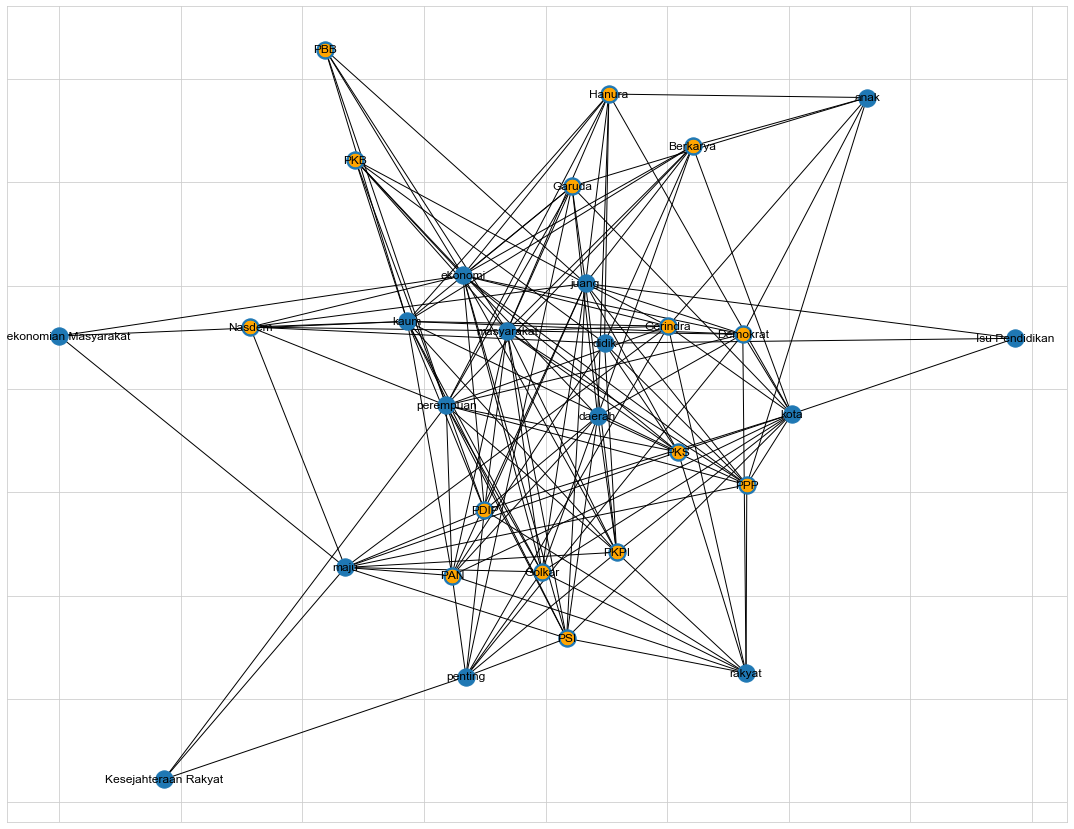

In [13]:
fig, ax = plt.subplots(figsize=(19,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels = True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
partaipopuler = [namapartai for namapartai in df.partai if g.degree(namapartai) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=partaipopuler, node_color='orange', node_size=150)

In [14]:
# Precompute probabilities and generate walks
node2vec = Node2Vec(g, dimensions=50, walk_length=16, num_walks=100, workers=4)

Computing transition probabilities: 100%|█████████████████████████████████████████████| 30/30 [00:00<00:00, 884.02it/s]


In [15]:
# EmbedQ
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [16]:
df.partai

0       Golkar
1          PAN
2          PSI
3       Hanura
4         PDIP
5     Berkarya
6          PKB
7     Demokrat
8          PPP
9       Garuda
10        PKPI
11    Gerindra
12         PBB
13      Nasdem
14         PKS
15      Golkar
16    Gerindra
17         PAN
18         PSI
19         PKS
20         PPP
21        PDIP
22        PKPI
23    Demokrat
24      Nasdem
25      Garuda
26    Gerindra
27      Garuda
28         PKB
29         PSI
30      Golkar
31         PPP
32    Berkarya
33         PBB
34      Nasdem
35         PKS
36         PAN
37    Demokrat
38        PDIP
39      Hanura
40        PKPI
Name: partai, dtype: object

In [17]:
used = set()
nodepartai = [x for x in df.partai if x not in used and (used.add(x) or True)]
#nodepartai = set(nodepartai)
nodepartai

['Golkar',
 'PAN',
 'PSI',
 'Hanura',
 'PDIP',
 'Berkarya',
 'PKB',
 'Demokrat',
 'PPP',
 'Garuda',
 'PKPI',
 'Gerindra',
 'PBB',
 'Nasdem',
 'PKS']

In [18]:
nodepartai2 = [x for x in df.partai]
nodepartai2

['Golkar',
 'PAN',
 'PSI',
 'Hanura',
 'PDIP',
 'Berkarya',
 'PKB',
 'Demokrat',
 'PPP',
 'Garuda',
 'PKPI',
 'Gerindra',
 'PBB',
 'Nasdem',
 'PKS',
 'Golkar',
 'Gerindra',
 'PAN',
 'PSI',
 'PKS',
 'PPP',
 'PDIP',
 'PKPI',
 'Demokrat',
 'Nasdem',
 'Garuda',
 'Gerindra',
 'Garuda',
 'PKB',
 'PSI',
 'Golkar',
 'PPP',
 'Berkarya',
 'PBB',
 'Nasdem',
 'PKS',
 'PAN',
 'Demokrat',
 'PDIP',
 'Hanura',
 'PKPI']

In [19]:
nodekategori = [x for x in df.kategori]
#nodepartai = set(nodepartai)
nodekategori

['Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Perekonomian Masyarakat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Kesejahteraan Rakyat',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan',
 'Isu Pendidikan']

In [20]:
used = set()
#uniq = ['PARTAI_KEADILAN_SEJAHTERA']
uniq2 = [x for x in nodepartai if x not in used and (used.add(x) or True)]
uniq2

['Golkar',
 'PAN',
 'PSI',
 'Hanura',
 'PDIP',
 'Berkarya',
 'PKB',
 'Demokrat',
 'PPP',
 'Garuda',
 'PKPI',
 'Gerindra',
 'PBB',
 'Nasdem',
 'PKS']

In [21]:
embeddings = np.array([model.wv[x] for x in nodepartai2])
embeddings

array([[-0.18048202, -0.2072316 , -0.04850569, ..., -0.18084806,
         0.12899338, -0.2255761 ],
       [-0.1829301 , -0.2093045 , -0.05796922, ..., -0.17810883,
         0.13189399, -0.21695483],
       [-0.179974  , -0.20158963, -0.05075002, ..., -0.17238162,
         0.14649597, -0.231927  ],
       ...,
       [-0.18923898, -0.19859141, -0.05874555, ..., -0.16566266,
         0.12470532, -0.23513198],
       [-0.16344126, -0.21039586, -0.04683144, ..., -0.1773332 ,
         0.15130898, -0.23325776],
       [-0.18667316, -0.20876431, -0.06527897, ..., -0.17722371,
         0.13426378, -0.21819577]], dtype=float32)

In [22]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [23]:
warna_kategori = {
    'Perekonomian Masyarakat':'lightsalmon',
    'Kesejahteraan Rakyat':'palegreen',
    'Isu Pendidikan':'blue'}
    #'Partai_Keadilan_Sejahtera':'yellow',
    #'Partai_Kebangkitan_Bangsa':'darkcyan',
    #'Partai_Persatuan_Pembangunan':'steelblue'}

df['color'] = df['kategori'].apply(lambda x: warna_kategori[x])
warna_partai=dict(zip(df['partai'],df['color']))
colors = [warna_kategori[x] for x in df.kategori]

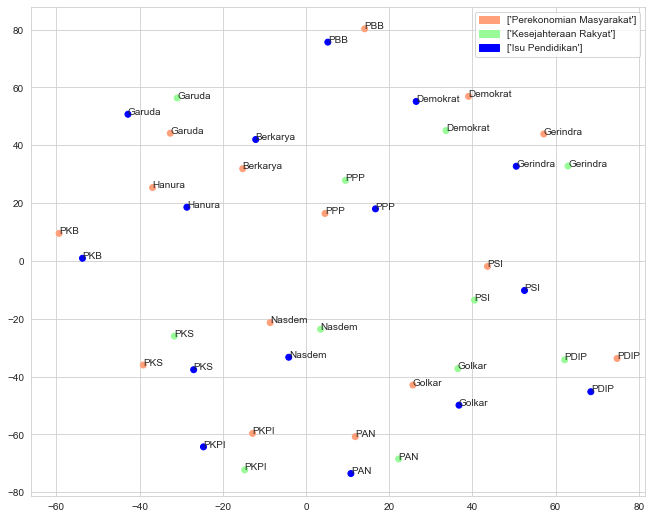

In [24]:
figure = plt.figure(figsize=(11,9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=colors)

i = 0
for partaiku in nodepartai2:
    ax.annotate(partaiku, (embeddings_2d[i,0], embeddings_2d[i, 1]))
    i=i+1
    

partai_legend=[mpatches.Patch(color=color, label=df.partai.unique()) for df.partai, color in warna_kategori.items()]
ax.legend(handles=partai_legend);

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,node_color=node_color,node_size=node_size )
plt.axis('off')